In [15]:
import json
import numpy as np
import pandas as pd
from scipy import stats
import plotter_lib as pl
from sklearn.metrics import mean_squared_error


metricas=["direct_play", "counterattack","T_build_up","T_zona_media","flow_rate","crossing","pressure_point","shots"]

ligas = ["England","France","Germany", "Italy", "Spain"]

In [4]:
arx = "/home/chacoma/Lineas/Futbol/Ranking/ranking-futbol/data/league2team2ptos.json"

league2team2ptos = json.load(open(arx,'r'))

liga2ptos ={}

for liga in ligas:

    x = np.array(sorted(list(league2team2ptos[liga].values()), reverse=True))

    liga2ptos[liga]=x

In [10]:


for liga in ligas:

    print(liga)

    v1 = liga2ptos[liga]

    for met in metricas:

        arx = f'data/{liga}_{met}.csv'

        df = pd.read_csv( arx )

        v2 = df["value"].to_numpy()

        r,pv = stats.pearsonr(v1,v2)

        print ( "\t", met, r,pv )





        

England
	 direct_play 0.8679506826156618 7.109313616434859e-07
	 counterattack 0.8154452064331295 1.181609846272378e-05
	 T_build_up 0.8066526467488006 1.73571427432027e-05
	 T_zona_media 0.8754229459716549 4.3299678205967935e-07
	 flow_rate 0.8814829037357019 2.828455834494704e-07
	 crossing 0.7899890302437504 3.4212968590550664e-05
	 pressure_point 0.8939466057545444 1.090641046901351e-07
	 shots 0.8463071322219612 2.5651634589038682e-06
France
	 direct_play 0.6730210510057074 0.0011457368397194156
	 counterattack 0.494435848710137 0.02668517165301438
	 T_build_up 0.5179874687384538 0.01930939722808264
	 T_zona_media 0.6588789563591964 0.0015811528950482037
	 flow_rate 0.7289511459549672 0.00026638372952102223
	 crossing 0.4143224871094004 0.06933532951162664
	 pressure_point 0.7948273435907122 2.8272364206486194e-05
	 shots 0.5102552567534089 0.02152480683730304
Germany
	 direct_play 0.7739100821608353 0.00016410179247571522
	 counterattack 0.4556346266347624 0.057403525488288545
	 

In [13]:



for liga in ligas:

    print(liga)

    v1_ = liga2ptos[liga]

    v1 = stats.zscore(v1_)

    for met in metricas:

        arx = f'data/{liga}_{met}.csv'

        df = pd.read_csv( arx )

        v2_ = df["value"].to_numpy()

        v2 = stats.zscore(v2_)

        r = mean_squared_error(v1,v2)

        print ( "\t", met, r)









England
	 direct_play 0.26409863476867634
	 counterattack 0.3691095871337409
	 T_build_up 0.3866947065023986
	 T_zona_media 0.24915410805668997
	 flow_rate 0.2370341925285962
	 crossing 0.4200219395124994
	 pressure_point 0.21210678849091105
	 shots 0.3073857355560782
France
	 direct_play 0.6539578979885847
	 counterattack 1.011128302579726
	 T_build_up 0.9640250625230926
	 T_zona_media 0.6822420872816071
	 flow_rate 0.5420977080900656
	 crossing 1.171355025781199
	 pressure_point 0.41034531281857556
	 shots 0.979489486493182
Germany
	 direct_play 0.45217983567832953
	 counterattack 1.088730746730475
	 T_build_up 0.7077917040518035
	 T_zona_media 0.6771961346754691
	 flow_rate 0.6678559715267435
	 crossing 1.021205901061996
	 pressure_point 0.47704054607452345
	 shots 0.9088545713182883
Italy
	 direct_play 0.2644938383442986
	 counterattack 0.7377421378158543
	 T_build_up 0.41446410681078305
	 T_zona_media 0.34150575922059223
	 flow_rate 0.341103032033425
	 crossing 0.8849261047893275


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


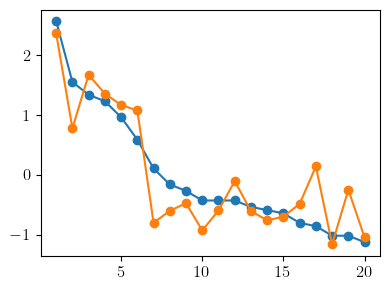

In [18]:
liga = 'England'

arx = f"/home/chacoma/Lineas/Futbol/Ranking/ranking-futbol/data/raiting_acumulado/data/{liga}_pressure_point.csv"

df = pd.read_csv(arx)


x1_ = liga2ptos[liga]
x2_ = df["value"].to_numpy()

x = df["team"].to_numpy()

x1 = stats.zscore(x1_)
x2 = stats.zscore(x2_)

plot =pl.Plotter()

plot.ax.plot(x,x1, marker='o')
plot.ax.plot(x,x2, marker='o')

plot.show()

